# Data Preprocessing & Descriptive Statistics

## Imports

In [1]:
import json
import yaml
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import time
import torch

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Databases

In [2]:
with open('entities.json', 'r') as f:
    entities_data = json.load(f)

In [3]:
with open('tokens.yml', 'r') as f:
    tokens_data = yaml.safe_load(f)

## Preprocessing

In [4]:
tokens_start = {key: value['start'] for key, value in tokens_data.items()}
tokens_list = list(tokens_start.values())
tokens_start = {value: key for key, value in tokens_start.items()}
pattern = '(' + '|'.join(re.escape(token) for token in tokens_list) + ')'

In [5]:
data_split = [item for key in entities_data.keys() for item in entities_data[key].split('\n')]

In [6]:
df = pd.DataFrame(columns=list(tokens_data.keys()))

In [7]:
i = 0
for info in data_split:
    m = re.split(pattern, info)
    filtered_m = [element for element in m if element != ""]
    if any(token in m for token in tokens_list):
        for k in range(0,len(filtered_m),2):
            token_start = filtered_m[k]
            if token_start in tokens_list:
                variable = tokens_start[token_start]
                value = filtered_m[k+1]
                df.loc[i,variable] = value
        i+=1

In [8]:
df

,age,birth_date,civil_status,education_level,employer,firstname,link,lob,maiden_name,nationality,observation,occupation,surname,surname_household
0,25,NaN,Garçon,NaN,NaN,Cyrille,NaN,NaN,NaN,française,NaN,menuisier,Breton,NaN
1,30,NaN,Garçon,NaN,NaN,Auguste,NaN,NaN,NaN,Piémontaise,NaN,vitrier,NaN,Ferazzi
2,24,NaN,Garçon,NaN,NaN,Pierre,NaN,NaN,NaN,Piémontaise,NaN,vitrier,NaN,Machol
3,48,NaN,Homme marié,NaN,NaN,Alexandre,NaN,NaN,NaN,française,NaN,prop re,NaN,Desbois
4,30,NaN,NaN,NaN,NaN,Zélie,sa fe,NaN,NaN,française,NaN,prop re,Vignat,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25070,NaN,1869,NaN,NaN,NaN,Marie,chef,Pailharès,NaN,idem,NaN,NaN,NaN,Chameton-Dideron
25071,NaN,1863,NaN,NaN,Cara,Marie,chef,St Naz en Royans,NaN,idem,NaN,ouv chaus res,NaN,Ode
25072,NaN,1886,NaN,NaN,Baretto,Nello,chef,Castel,NaN,italienne,NaN,manoeuvre,NaN,Berni
25073,NaN,1887,NaN,NaN,NaN,Annunziata,épouse,idem,NaN,idem,NaN,NaN,Berni-Laureti,NaN


In [9]:
df.reset_index(inplace=True)

In [10]:
df = df.drop('index',axis=1)

## Drop the "item" label

In [11]:
for col in df.columns:
    previous_value = None
    for i, value in enumerate(df[col]):
        if "idem" in str(value):
            df.at[i, col] = previous_value
        previous_value = df.at[i, col]

In [12]:
df

,age,birth_date,civil_status,education_level,employer,firstname,link,lob,maiden_name,nationality,observation,occupation,surname,surname_household
0,25,NaN,Garçon,NaN,NaN,Cyrille,NaN,NaN,NaN,française,NaN,menuisier,Breton,NaN
1,30,NaN,Garçon,NaN,NaN,Auguste,NaN,NaN,NaN,Piémontaise,NaN,vitrier,NaN,Ferazzi
2,24,NaN,Garçon,NaN,NaN,Pierre,NaN,NaN,NaN,Piémontaise,NaN,vitrier,NaN,Machol
3,48,NaN,Homme marié,NaN,NaN,Alexandre,NaN,NaN,NaN,française,NaN,prop re,NaN,Desbois
4,30,NaN,NaN,NaN,NaN,Zélie,sa fe,NaN,NaN,française,NaN,prop re,Vignat,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25069,NaN,1869,NaN,NaN,NaN,Marie,chef,Pailharès,NaN,française,NaN,NaN,NaN,Chameton-Dideron
25070,NaN,1863,NaN,NaN,Cara,Marie,chef,St Naz en Royans,NaN,française,NaN,ouv chaus res,NaN,Ode
25071,NaN,1886,NaN,NaN,Baretto,Nello,chef,Castel,NaN,italienne,NaN,manoeuvre,NaN,Berni
25072,NaN,1887,NaN,NaN,NaN,Annunziata,épouse,Castel,NaN,italienne,NaN,NaN,Berni-Laureti,NaN


## Definition of Household Label

In [13]:
df['household'] = df['surname_household'].apply(lambda x: 0 if pd.isna(x) else 1)

In [14]:
df

,age,birth_date,civil_status,education_level,employer,firstname,link,lob,maiden_name,nationality,observation,occupation,surname,surname_household,household
0,25,NaN,Garçon,NaN,NaN,Cyrille,NaN,NaN,NaN,française,NaN,menuisier,Breton,NaN,0
1,30,NaN,Garçon,NaN,NaN,Auguste,NaN,NaN,NaN,Piémontaise,NaN,vitrier,NaN,Ferazzi,1
2,24,NaN,Garçon,NaN,NaN,Pierre,NaN,NaN,NaN,Piémontaise,NaN,vitrier,NaN,Machol,1
3,48,NaN,Homme marié,NaN,NaN,Alexandre,NaN,NaN,NaN,française,NaN,prop re,NaN,Desbois,1
4,30,NaN,NaN,NaN,NaN,Zélie,sa fe,NaN,NaN,française,NaN,prop re,Vignat,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25069,NaN,1869,NaN,NaN,NaN,Marie,chef,Pailharès,NaN,française,NaN,NaN,NaN,Chameton-Dideron,1
25070,NaN,1863,NaN,NaN,Cara,Marie,chef,St Naz en Royans,NaN,française,NaN,ouv chaus res,NaN,Ode,1
25071,NaN,1886,NaN,NaN,Baretto,Nello,chef,Castel,NaN,italienne,NaN,manoeuvre,NaN,Berni,1
25072,NaN,1887,NaN,NaN,NaN,Annunziata,épouse,Castel,NaN,italienne,NaN,NaN,Berni-Laureti,NaN,0


## Descriptive Statistics

In [15]:
df['occupation'].unique()

array(['menuisier ', 'vitrier ', 'prop re ', ..., 'm de foraine ',
       'rept com ce ', 'employé enregistrement '], dtype=object)

In [16]:
civil_status_homme = ['Garçon ', 'Homme marié ','Homme marié', 'Veuf ', 'Garçon', 'Veuf']

In [17]:
df['sexe'] = df['civil_status'].apply(lambda x: np.nan if pd.isna(x) else (1 if x in civil_status_homme else 0))

In [18]:
df["household"].value_counts()

household
0    19438
1     5636
Name: count, dtype: int64

In [19]:
df['sexe'].value_counts()

sexe
0.0    5448
1.0    5256
Name: count, dtype: int64

In [20]:
df.dtypes

age                   object
birth_date            object
civil_status          object
education_level       object
employer              object
firstname             object
link                  object
lob                   object
maiden_name           object
nationality           object
observation           object
occupation            object
surname               object
surname_household     object
household              int64
sexe                 float64
dtype: object

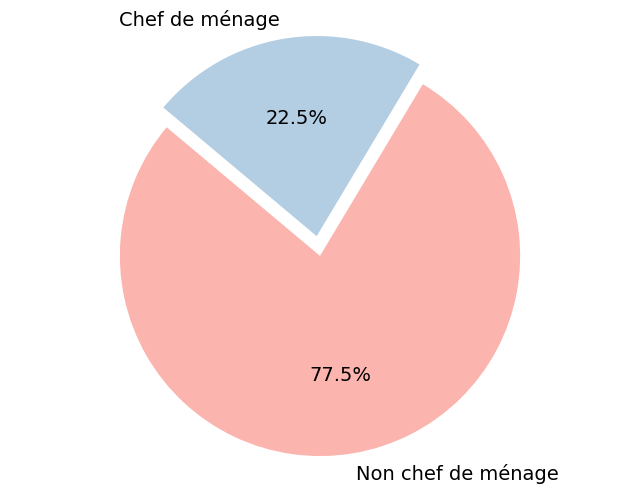

In [21]:
count_values = df['household'].value_counts()
explode = (0,0.1)
plt.figure(figsize=(8, 6))
plt.pie(count_values, autopct='%1.1f%%', startangle=140, labels=['Non chef de ménage', "Chef de ménage"],explode=explode,colors=plt.cm.Pastel1(range(2)),textprops={'fontsize': 14})
plt.axis('equal')  
plt.show()

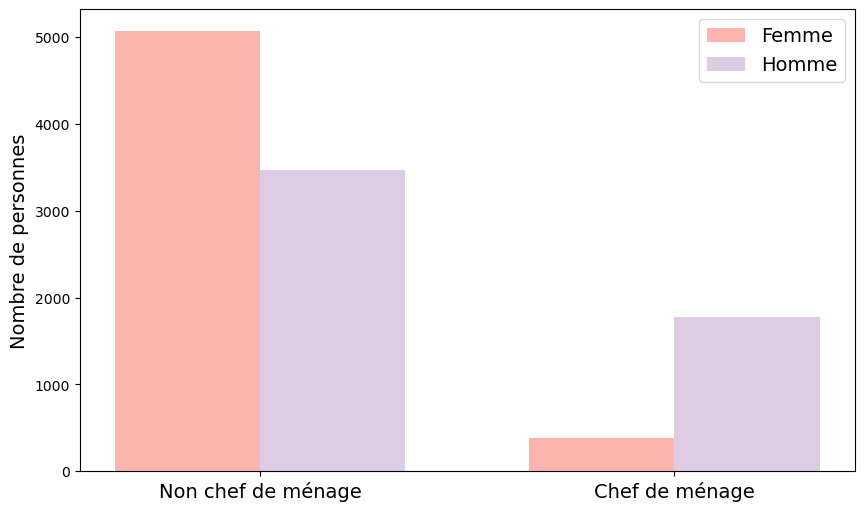

In [22]:
grouped = df.groupby(['household', 'sexe']).size().unstack(fill_value=0)

# Obtenir les index pour les positions des barres
index = np.arange(len(grouped))

# Largeur des barres
bar_width = 0.35

colors = plt.cm.Pastel1(np.linspace(0, 1, 4))

# Créer le graphique à barres
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index - bar_width/2, grouped[0], bar_width, label='Femme', color=colors[0])
bar2 = ax.bar(index + bar_width/2, grouped[1], bar_width, label='Homme', color=colors[1])

# Ajouter des étiquettes et un titre

ax.set_ylabel('Nombre de personnes',fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(["Non chef de ménage","Chef de ménage"],fontsize=14)
plt.legend(fontsize=14)

# Afficher le graphique
plt.show()

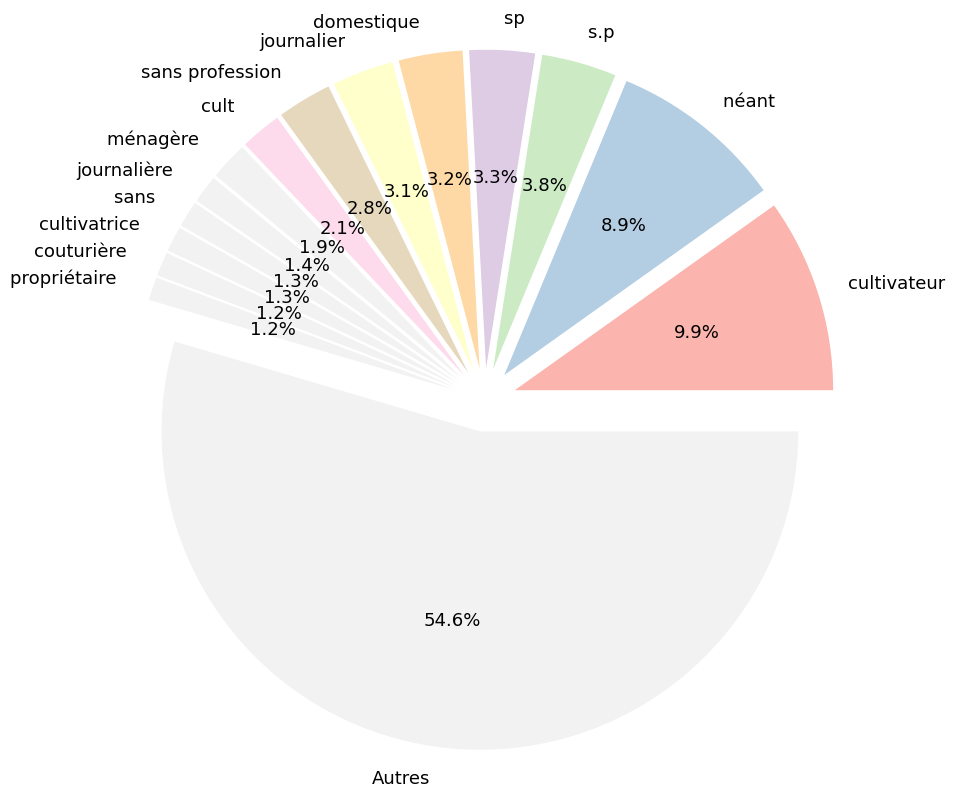

In [23]:
count_values = df['occupation'].value_counts()

# Regroupez les valeurs de moins de 1% dans une catégorie "Autres"
threshold = 0.01  # 1%
total = count_values.sum()
count_values = count_values[count_values / total >= threshold]
other_count = total - count_values.sum()
count_values['Autres'] = other_count

# Définissez les couleurs et l'explosion pour le diagramme circulaire
colors = plt.cm.Pastel1(range(len(count_values)))
explode = [0.1] * len(count_values)  # explosion pour mettre en évidence chaque tranche

# Créez le diagramme circulaire avec les étiquettes
plt.figure(figsize=(12, 10))
plt.pie(count_values, labels=count_values.index, autopct='%1.1f%%', colors=colors, explode=explode, textprops={'fontsize': 13})
plt.axis('equal')
plt.show()

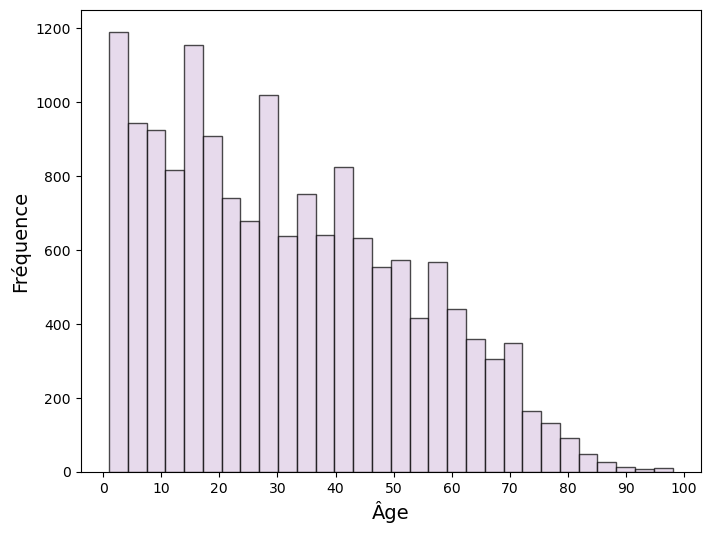

In [24]:
ages = pd.to_numeric(df['age'], errors='coerce').dropna()
valid_ages = ages.loc[ages < 100]

plt.figure(figsize=(8, 6))
plt.hist(valid_ages, bins=30, edgecolor='black', alpha=0.7, color=plt.cm.Pastel1(3))
plt.xlabel('Âge',fontsize=14)
plt.ylabel('Fréquence',fontsize=14)


# Définir les graduations de l'axe x pour afficher tous les 10 ans
plt.xticks(range(0, int(max(valid_ages))+10, 10))

plt.show()

## Save the dataframe

In [25]:
df.to_csv('database.csv', index=False)